In [1]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
sns.set_context('paper')
pd.set_option('display.max_columns', None)

In [2]:
with open("../Data/simu4_design.pkl", 'rb') as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)

In [3]:
# df_study = df_study.loc[df_study.session < 5]
df_study

,itemno,item,itemno_old,freq,quantile,session
0,316,FARM,552,1161,8,0
1,477,LEOPARD,812,118,3,0
2,433,INSTRUCTOR,741,78,2,0
3,87,BOTTLE,153,1479,8,0
4,84,BOOT,150,149,3,0
...,...,...,...,...,...,...
99995,895,TOWN,1491,3328,9,999
99996,633,PIANO,1057,466,6,999
99997,843,SUBMARINE,1398,154,3,999
99998,462,LABYRINTH,791,32,0,999


In [4]:
# df_test = df_test.loc[df_test.session < 200]
df_test

,itemno,item,itemno_old,freq,quantile,session,old
0,341,FORT,595,411,6,0,True
1,512,MANSION,864,156,3,0,True
2,66,BENCH,121,345,6,0,True
3,386,GUARD,667,658,7,0,False
4,57,BEE,112,185,4,0,True
...,...,...,...,...,...,...,...
199995,503,LUNG,850,169,4,999,True
199996,891,TORNADO,1485,34,0,999,False
199997,932,VEHICLE,1553,383,6,999,False
199998,735,RUG,1215,321,5,999,True


### Run CMR-IA

In [5]:
# s_mat = np.loadtxt('../Data/wordpools/w2v.txt')
s_mat = np.load('../Data/simu4_smat.npy')

In [6]:
params = cmr.make_default_params()
params.update(
    beta_enc = 0.55,
    beta_rec = 0.1,
    beta_rec_post = 0.2,
    gamma_fc = 0.1,
    s_fc = 0.1,
    c_thresh = 0.3,
    a = 2800,
    b = 2.14,
    m = -80,
    n = 12,
)
params

{'beta_enc': 0.55,
 'beta_rec': 0.1,
 'beta_rec_new': 0.5,
 'beta_rec_post': 0.2,
 'beta_distract': None,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 0.1,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 8,
 'alpha': 4,
 'c_thresh': 0.3,
 'lamb': 0.5,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 2.14,
 'm': -80,
 'n': 12,
 'gamma_fc': 0.1,
 'gamma_cf': 0.5}

In [7]:
df_simu = cmr.run_norm_recog_multi_sess(params,df_study,df_test,s_mat)
df_simu

CMR Time: 42.108415365219116


,session,itemno,s_resp,s_rt,csim
0,0,341,0.0,2175.991943,0.182180
1,0,512,1.0,2687.908203,0.319092
2,0,66,0.0,2226.499268,0.192902
3,0,386,0.0,2232.467041,0.194153
4,0,57,0.0,2496.316650,0.246354
...,...,...,...,...,...
199995,999,503,1.0,2335.970459,0.384669
199996,999,891,0.0,1752.551758,0.081053
199997,999,932,0.0,1871.049683,0.111626
199998,999,735,1.0,2637.112549,0.328007


In [8]:
df_simu = df_simu.merge(df_test,on=['session','itemno'])
df_simu

,session,itemno,s_resp,s_rt,csim,item,itemno_old,freq,quantile,old
0,0,341,0.0,2175.991943,0.182180,FORT,595,411,6,True
1,0,512,1.0,2687.908203,0.319092,MANSION,864,156,3,True
2,0,66,0.0,2226.499268,0.192902,BENCH,121,345,6,True
3,0,386,0.0,2232.467041,0.194153,GUARD,667,658,7,False
4,0,57,0.0,2496.316650,0.246354,BEE,112,185,4,True
...,...,...,...,...,...,...,...,...,...,...
199995,999,503,1.0,2335.970459,0.384669,LUNG,850,169,4,True
199996,999,891,0.0,1752.551758,0.081053,TORNADO,1485,34,0,False
199997,999,932,0.0,1871.049683,0.111626,VEHICLE,1553,383,6,False
199998,999,735,1.0,2637.112549,0.328007,RUG,1215,321,5,True


In [9]:
df_simu.groupby(['old']).s_resp.mean()

old
False    0.04361
True     0.79616
Name: s_resp, dtype: float64

### WFE

In [10]:
# get wordfreq quantile
with open('../Data/simu4_word_freq.pkl', 'rb') as inp:
    df = pickle.load(inp)
df

,item,itemno_old,itemno,freq,quantile
0,ABDOMEN,1,1,110,2
1,ACROBAT,4,2,17,0
2,ADULT,8,3,906,8
3,ALLEY,15,4,165,3
4,ALLIGATOR,16,5,12,0
...,...,...,...,...,...
979,YOKE,1632,980,12,0
980,YOLK,1633,981,47,1
981,YOUTH,1634,982,1159,8
982,ZIPPER,1636,983,24,0


In [11]:
freq_mean = df.groupby("quantile").freq.mean().to_numpy()
freq_mean = np.around(freq_mean, decimals=0)
freq_mean

array([  22.,   54.,   92.,  143.,  200.,  286.,  417.,  635., 1159.,
       4332.])

In [12]:
item2q = df[["itemno","quantile"]].set_index("itemno").to_dict()['quantile']
create_level = {0:"new lf", 1:"new hf", 2:"old lf", 3:"old hf"}

df_simu['quantile'] = df_simu.apply(lambda x: item2q[x["itemno"]], axis=1)
df_simu['hf'] = df_simu['quantile'] >= 5
df_simu['level'] = df_simu.apply(lambda x: create_level[x['old'] * 2 + x['hf']], axis = 1)
df_simu

,session,itemno,s_resp,s_rt,csim,item,itemno_old,freq,quantile,old,hf,level
0,0,341,0.0,2175.991943,0.182180,FORT,595,411,6,True,True,old hf
1,0,512,1.0,2687.908203,0.319092,MANSION,864,156,3,True,False,old lf
2,0,66,0.0,2226.499268,0.192902,BENCH,121,345,6,True,True,old hf
3,0,386,0.0,2232.467041,0.194153,GUARD,667,658,7,False,True,new hf
4,0,57,0.0,2496.316650,0.246354,BEE,112,185,4,True,False,old lf
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,999,503,1.0,2335.970459,0.384669,LUNG,850,169,4,True,False,old lf
199996,999,891,0.0,1752.551758,0.081053,TORNADO,1485,34,0,False,False,new lf
199997,999,932,0.0,1871.049683,0.111626,VEHICLE,1553,383,6,False,True,new hf
199998,999,735,1.0,2637.112549,0.328007,RUG,1215,321,5,True,True,old hf


In [13]:
df_simu.groupby(["old","quantile"]).csim.mean()

old    quantile
False  0           0.128561
       1           0.144347
       2           0.150457
       3           0.170857
       4           0.177114
       5           0.180208
       6           0.184553
       7           0.168749
       8           0.177432
       9           0.183670
True   0           0.366005
       1           0.356716
       2           0.351602
       3           0.343953
       4           0.336848
       5           0.339801
       6           0.336629
       7           0.346083
       8           0.340440
       9           0.347591
Name: csim, dtype: float64

In [14]:
df_itemgp = pd.pivot_table(df_simu, values='s_resp', index=['itemno'],
                    columns=['old'],aggfunc = np.mean)
df_itemgp.columns = ['far','hr']
df_itemgp = df_itemgp.reset_index()
df_itemgp

,itemno,far,hr
0,1,0.0,0.887640
1,2,0.0,0.861702
2,3,0.0,0.834783
3,4,0.0,0.784314
4,5,0.0,0.904762
...,...,...,...
979,980,0.0,0.850467
980,981,0.0,0.941176
981,982,0.0,0.484536
982,983,0.0,0.861111


In [15]:
df_itemgp = df_itemgp.merge(df,on=['itemno'])
df_itemgp

,itemno,far,hr,item,itemno_old,freq,quantile
0,1,0.0,0.887640,ABDOMEN,1,110,2
1,2,0.0,0.861702,ACROBAT,4,17,0
2,3,0.0,0.834783,ADULT,8,906,8
3,4,0.0,0.784314,ALLEY,15,165,3
4,5,0.0,0.904762,ALLIGATOR,16,12,0
...,...,...,...,...,...,...,...
979,980,0.0,0.850467,YOKE,1632,12,0
980,981,0.0,0.941176,YOLK,1633,47,1
981,982,0.0,0.484536,YOUTH,1634,1159,8
982,983,0.0,0.861111,ZIPPER,1636,24,0


In [16]:
df_quantgp = df_itemgp.groupby(['quantile']).agg({'hr': 'mean', 'far': 'mean'}).reset_index()
df_quantgp['freq_mean'] = freq_mean
df_quantgp

,quantile,hr,far,freq_mean
0,0,0.870530,0.000000,22.0
1,1,0.854720,0.000102,54.0
2,2,0.833043,0.005730,92.0
3,3,0.793855,0.009421,143.0
4,4,0.771008,0.023908,200.0
5,5,0.766557,0.047840,286.0
6,6,0.750749,0.066579,417.0
7,7,0.777592,0.075620,635.0
8,8,0.753315,0.079514,1159.0
9,9,0.790706,0.130594,4332.0


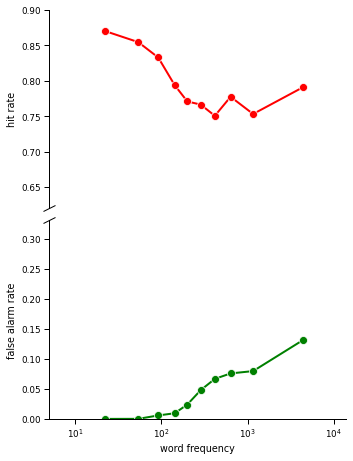

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,figsize=(5,6.5))
fig.subplots_adjust(hspace=0.03)

sns.lineplot(data=df_quantgp, y='hr', x='freq_mean', ax=ax1, marker = 'o', color = 'r', markersize = 8, linewidth = 2)
sns.lineplot(data=df_quantgp, y='far', x='freq_mean', ax=ax2, marker = 'o', color = 'g', markersize = 8, linewidth = 2)

ax1.set_ylim(0.62, 0.9)
ax1.set_yticks(np.arange(0.65,0.91,0.05))
ax2.set_ylim(0.05, 0.33)
ax2.set_yticks(np.arange(0,0.35,0.05))
plt.xscale('log')
plt.xlim(5, 14000)

ax1.spines.bottom.set_visible(False)
ax1.spines.top.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.spines.right.set_visible(False)
ax2.spines.right.set_visible(False)
ax1.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False, 
    labelbottom=False,
    labeltop=False) 
ax2.minorticks_off()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot(0,0, transform=ax1.transAxes, **kwargs)
ax2.plot(0,1, transform=ax2.transAxes, **kwargs)

ax1.set_ylabel('hit rate')
ax1.set_xlabel(None)
ax2.set_ylabel('false alarm rate')
ax2.set_xlabel('word frequency')

plt.tight_layout(h_pad = 0)
plt.savefig('fig/simu4_WFE.pdf')
plt.show()

### Analysis

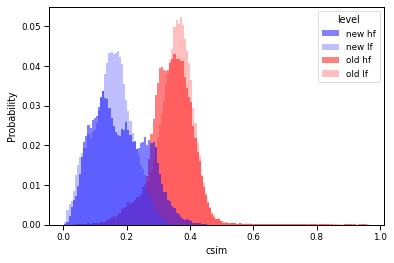

In [18]:
sns.histplot(data=df_simu, x="csim", hue = "level", hue_order = ["new hf", "new lf", "old hf", "old lf"], palette = [[0,0,1],[0.5,0.5,1],[1,0,0],[1,0.5,0.5]], stat = "probability", common_norm=False, edgecolor = None)
plt.savefig('fig/simu4_csim.pdf')

In [19]:
freq_order = df.sort_values(by="freq")['itemno'].to_numpy()

In [20]:
# n = len(df)
# smat_order = np.zeros((n,n))
# for i in range(n):
#     for j in range(n):
#         a = s_mat[freq_order[i],freq_order[j]]
#         if not np.isnan(a):
#             smat_order[i,j] = a
#         else:
#             smat_order[i,j] = 0

In [21]:
# smat_order

In [22]:
# plt.subplots(figsize=(20,20))
# sns.heatmap(smat_order,vmax = 0.5, vmin = 0, cmap = 'Reds')
# plt.xlabel('freq order')
# plt.ylabel('freq order')
# plt.title("association matrix of words in freq order")
# # plt.savefig('fig/simu4_smat.pdf')
# plt.show()

In [23]:
df.groupby("quantile").count()

,item,itemno_old,itemno,freq
quantile,,,,
0,100,100,100,100
1,97,97,97,97
2,98,98,98,98
3,102,102,102,102
4,95,95,95,95
5,98,98,98,98
6,101,101,101,101
7,96,96,96,96
8,98,98,98,98


In [24]:
# np.mean(smat_order[:,0:100])

In [25]:
# np.mean(smat_order[:,-100:-1])

In [26]:
s_mat_dia = s_mat.copy()
np.fill_diagonal(s_mat_dia, 0)
df["s_mean"] = np.mean(s_mat_dia,axis=1)
df["log_freq"] = np.log(df["freq"])
df

,item,itemno_old,itemno,freq,quantile,s_mean,log_freq
0,ABDOMEN,1,1,110,2,0.058265,4.700480
1,ACROBAT,4,2,17,0,0.072167,2.833213
2,ADULT,8,3,906,8,0.068509,6.809039
3,ALLEY,15,4,165,3,0.125680,5.105946
4,ALLIGATOR,16,5,12,0,0.076859,2.484907
...,...,...,...,...,...,...,...
979,YOKE,1632,980,12,0,0.087206,2.484907
980,YOLK,1633,981,47,1,0.029626,3.850148
981,YOUTH,1634,982,1159,8,0.137636,7.055313
982,ZIPPER,1636,983,24,0,0.071940,3.178054


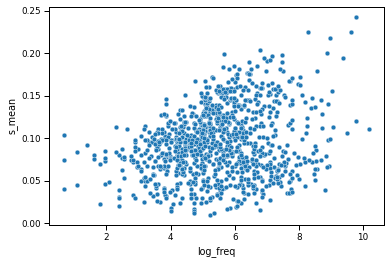

In [27]:
sns.scatterplot(data=df, x='log_freq', y='s_mean')
plt.savefig('fig/simu4_freq_sem.pdf')
plt.show()

In [28]:
import statsmodels.formula.api as smf

In [29]:
model1 = smf.ols(formula='s_mean ~ log_freq', data=df).fit() 
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 s_mean   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     62.19
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           8.29e-15
Time:                        04:21:08   Log-Likelihood:                 1797.7
No. Observations:                 984   AIC:                            -3591.
Df Residuals:                     982   BIC:                            -3582.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0590      0.005     12.387      0.0